In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from affinewarp import PiecewiseWarping

Populating the interactive namespace from numpy and matplotlib


In [2]:
n_knots = 0
model = PiecewiseWarping(n_knots=n_knots)

In [3]:
n_trials = 30
n_time = 100
n_neuron = 10
model.initialize_warps(n_trials)
model.x_knots, model.y_knots = model._mutate_knots(0.3);

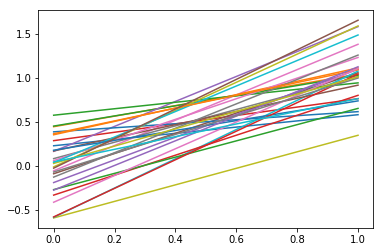

In [4]:
plot(model.x_knots.T, model.y_knots.T);

In [5]:
template = np.random.rand(n_time, n_neuron)
from scipy.ndimage import gaussian_filter1d
template_sigma = n_time / 50.
template = gaussian_filter1d(template, template_sigma, axis=0)
template[:n_time//4] = 0 # zero-pad boundaries
template[3*n_time//4:] = 0
model.template = template

aligned_data = np.tile(template[None, ...], (n_trials, 1, 1))
data = model.predict()

In [6]:
from affinewarp.visualization import visualize_affine_loss_grid

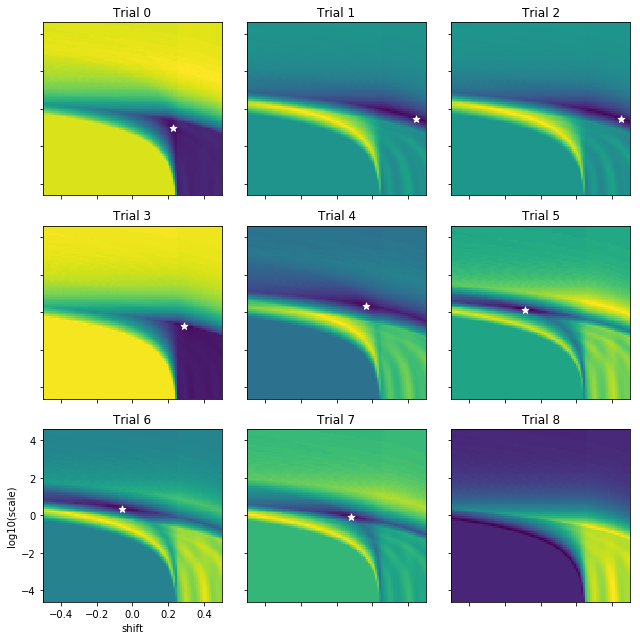

In [7]:
visualize_affine_loss_grid(model, data, n_trials=9);